# Visualizing Tweet Sentiment with Word Clouds

#### Data is from:

https://www.kaggle.com/kazanova/sentiment140/downloads/sentiment140.zip/2

It was automatically labeled using sentiment analysis. O is for negative tweets and 4 is used for positive tweets.


In [2]:
#Get directory path
import os
path = os.getcwd()
path

'C:\\Users\\Yrelav\\Documents\\Cognizant\\Gen_C\\June_2021_training\\NLP\\Tweets_sentiment1_v2.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in the data
columns = ['label', 'id', 'ds', 'flag', 'user', 'tweet']
df = pd.read_csv('Tweets_sentiment1.csv', names=columns)
print(df.shape)
print(df.columns)
df.dtypes

(785642, 6)
Index(['label', 'id', 'ds', 'flag', 'user', 'tweet'], dtype='object')


label     int64
id        int64
ds       object
flag     object
user     object
tweet    object
dtype: object

### Check the structure of the tweet column

In [4]:
df.head()

,label,id,ds,flag,user,tweet
0,0,2058621488,Sat Jun 06 15:18:09 PDT 2009,NO_QUERY,sweeneylove,despises the fact that she will not be able to...
1,0,2058621578,Sat Jun 06 15:18:10 PDT 2009,NO_QUERY,fernando_garcia,OMG!! Dulce Maria deleted her Twitter!!!
2,0,2058621741,Sat Jun 06 15:18:11 PDT 2009,NO_QUERY,DWsRoseC,@starbucksapron got my &quot;friend&quot; visi...
3,0,2058621788,Sat Jun 06 15:18:12 PDT 2009,NO_QUERY,valoreetravels,@princessjoya The place you used to work with ...
4,0,2058621991,Sat Jun 06 15:18:13 PDT 2009,NO_QUERY,meghanledger,"@missemilymac AHHHHH!!!! That sucks! So, are ..."


In [5]:
df.tail()

,label,id,ds,flag,user,tweet
785637,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
785638,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
785639,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
785640,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
785641,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
df.label.value_counts()

0    394838
4    390804
Name: label, dtype: int64

In [7]:
#Create some missing values to predict
df['label_pred'] = df.apply(lambda _: '', axis=1)

df['label_pred'] = np.where((df['ds'].str.contains('Jun 06 15')) & (df['label'] == 0) , 0,np.nan)
df.loc[(df['ds'].str.contains('Jun 03 05')) & (df['label'] == 4), 'label_pred'] = 4


df['label_pred'].value_counts()

4.0    2731
0.0    1458
Name: label_pred, dtype: int64

Above we can see that our new column, 'label_pred', only has a few thousand labeled values. This is much more likely if humans hand-label the data. Techniques are being developed to automatically label data, but most datasets will be human labeled. Getting good training sets is the challenge for machine learning. Bigger is better! But really big training sets take a lot of memory to process and visualize.

#### Tweets contain urls amd @ statements, let's check how many.

In [8]:
df_co = df['tweet'].loc[df['tweet'].str.contains("@")]
print(df_co.shape)
df_co.head()


(368546,)


2     @starbucksapron got my &quot;friend&quot; visi...
3     @princessjoya The place you used to work with ...
4     @missemilymac AHHHHH!!!!  That sucks! So, are ...
6                                       @gimp01 me too 
10    @MizzBizznizz ah shit don't tell me that I'm o...
Name: tweet, dtype: object

#### More than 35,000 of the tweets have urls in them. I will need to remove these during preprocessing, along with @statements.

### Create a sparse matrix for positive, negative, and neutral labels

## Preprocessing

In [9]:
import re
#Define a function to clean the text
def clean_text(text):
    text = text.lower()
    
    # <write a regex expression to take out the @ and what follows>
    # <write a regex expression to take out the web links (http) and what follows>
    
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub(r"co", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

#Clean the text
df['tweet'] = df['tweet'].map(lambda com : clean_text(com))


In [10]:
#This let's us count how many 'http' are left: There should be about 35,000
df_clean = df['tweet'].loc[df['tweet'].str.contains('http')]
print(df_clean.shape)
df_clean.head()

(35073,)


16    re drew sub no bike view http bit ly ik0oy by ...
28    hav not watched this video for ages i am in te...
32    sad to work tonight but happy i did 30 min of ...
72          help me figure it out http tinyurl m lx9ad7
77    http twitpic m 6s3mb ash and me sad the photos...
Name: tweet, dtype: object

In [11]:
#This let's us count how many are left: There should be zero.
df_clean = df['tweet'].loc[df['tweet'].str.contains('@')]
print(df_clean.shape)
df_clean.head()

(0,)


Series([], Name: tweet, dtype: object)

In [12]:
df.head()

,label,id,ds,flag,user,tweet,label_pred
0,0,2058621488,Sat Jun 06 15:18:09 PDT 2009,NO_QUERY,sweeneylove,despises the fact that she will not be able to...,0.0
1,0,2058621578,Sat Jun 06 15:18:10 PDT 2009,NO_QUERY,fernando_garcia,omg dulce maria deleted her twitter,0.0
2,0,2058621741,Sat Jun 06 15:18:11 PDT 2009,NO_QUERY,DWsRoseC,starbucksapron got my quot friend quot visitin...,0.0
3,0,2058621788,Sat Jun 06 15:18:12 PDT 2009,NO_QUERY,valoreetravels,princessjoya the place you used to work with t...,0.0
4,0,2058621991,Sat Jun 06 15:18:13 PDT 2009,NO_QUERY,meghanledger,missemilymac ahhhhh that sucks so are we hangi...,0.0


### Create a table to examine the distribution of tags

In [13]:
#Check the shape of the training set (should be 4189, 7)
df_train = df.loc[df['label_pred'].notnull()]
print(df_train.shape)

(4189, 7)


### Check distribution of words in the tweets

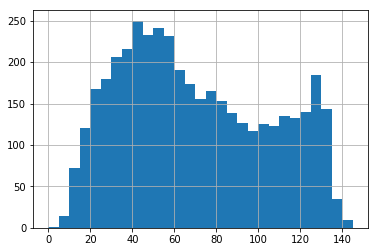

In [14]:
#Create a histogram to see the distribution of the words in the tweets

lens = df_train['tweet'].str.len()
lens.hist(bins = np.arange(0,150,5))

## Featurize the data

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

Here we are using CountVectorizer so that we can make the cumulative distribution function below. This is NOT the same as featurizing before running classification algorithms. Follow the example from the Articles notebook.


In [15]:
#Create variables (features) from the tweets text.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fit=cv.fit_transform(df_train['tweet'])

cv_fit.shape

(4189, 10203)

### Visualize the data

#### Use a cumulative distribution function to determine the minimum and maximum words needed to capture the variation in the data


In [16]:
words = cv_fit.toarray()
words = words.astype(dtype=bool)
numlist = [0]*len(words[0])
for word in words:
    numlist += word
print(numlist[1:10])
type(numlist)

[5 1 1 1 1 1 1 1 1]


numpy.ndarray

In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

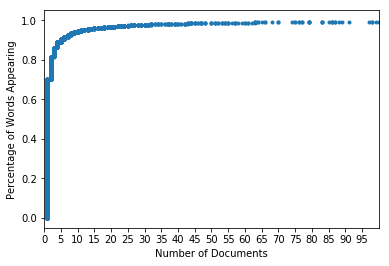

In [18]:
# Compute ECDF 
x, y = ecdf(numlist)

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.rcParams["figure.figsize"] = [10,5]

# Label the axes
_ = plt.xlim(0,100)
_ = plt.xticks(np.arange(0, 100, step=5))
_ = plt.xlabel('Number of Documents')
_ = plt.ylabel('Percentage of Words Appearing')
plt.savefig('ecdf_tweets.png')

# Display the plot
plt.show()


#### Figure 1. ECDF for tweets in the corpus.

This graph shows that most of words are found within the first 25 tweets. We can set the df_min = 1 and the df_max = 15

## Visualize with a word cloud all of the tweets

In [19]:
# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [20]:
# Make text for all tweets
text = list(df_train['tweet'].values)

summary1 = []
for i in range(len(text)):
    summary = ' '.join(str(x) for x in text)
    summary1.append(summary) 
alltext = summary1[0] 

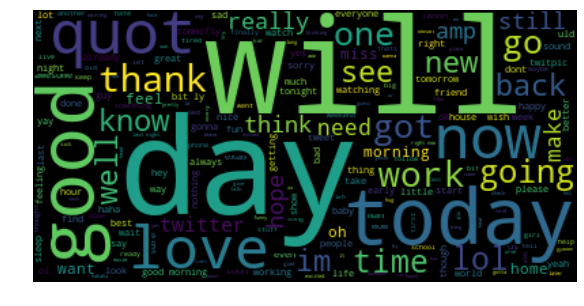

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(alltext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
#wordcloud.to_file('/Users/valery/Documents/Springboard/Capstone 2/racecloud.png')
plt.show()

#### Fig 2. Word cloud for all the tweets.

### Vizualize with word clouds for each category: Positive, Negative

In [22]:
# Make text for each category tweets
df_pos = df_train[df_train['label_pred'] == 4]
df_neg = df_train[df_train['label_pred'] == 0]

text_pos = list(df_pos['tweet'].values)
text_neg = list(df_neg['tweet'].values)



In [23]:
#Positive tweets

<add code here>

SyntaxError: invalid syntax (<ipython-input-23-3d557508ee62>, line 3)

In [ ]:
#Negative tweets
 
<add code here>

In [ ]:
# Create and generate a word cloud image for positive tweets:
wordcloud = WordCloud().generate(alltext_pos)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
#wordcloud.to_file('/Users/valery/Documents/Springboard/Capstone 2/racecloud_pos.png')

plt.show()

#### Fig 3. Word cloud for positive tweets.



In [ ]:
# Create and generate a word cloud image for negative tweets:

<add code here>



#### Fig 4. Word cloud for negative tweets.
 

What are you thoughts on these tweets? Do you think the automatic labeling worked well to distinquish the difference between positive and negative tweets?

## Mini-Project Assignment

1. Create a sparse matrix (one-hot encoder/vector) for the training set for Positive and Negative categories. Remember that positive tweets are tagged with 4 and negative tweets are tagged with 0. 

2. Set up the vectorizer/featurizer and adapt the code to featurize the tweets.

3. Pick one of the classifiers we used for the Articles notebook and run it with this data. 

Do what you can, struggle a little, and we'll talk about it in a short meeting this afternoon.